<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/tjms_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f as fisher_f
from matplotlib import pyplot as plt
from scipy.stats import f, norm
plt.figure(figsize=(12,8))
sns.set_style(style='darkgrid')

<Figure size 864x576 with 0 Axes>

Общее среднее равно: 0.5
Общая суммa квадратов отклонений равна: 2.56
Факторная сумма квадратов отклонений групповых средних от общей средней равна 0.248
Остаточная сумма квадратов отклонений 2.312
Факторная дисперсия: 0.0827
Остаточная дисперсия: 0.0642
F наблюдений (Факторная дисперсия/Остаточная дисперсия): 1.29
Ф критическое = 2.87
В связи с тем, что fнабл < fкр, нулевую гипотезу о существенном влиянии фактора на результаты экспериментов принимаем 
(альтернативную гипотезу о различии групповых средних отвергаем). 
Другими словами, групповые средние в целом различаются незначимо.


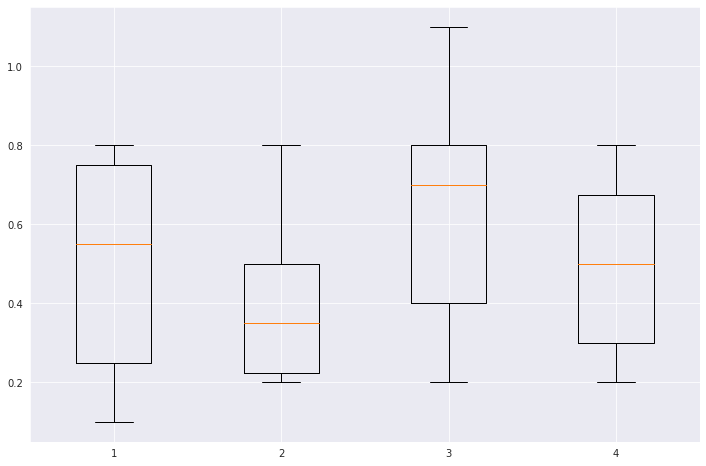

In [ ]:
f1 = [0.6, 0.2, 0.4, 0.5, 0.8, 0.2, 0.1, 0.6, 0.8, 0.8]  # factor 1
f2 = [0.2, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 0.2, 0.5, 0.5]  # factor 2
f3 = [0.8, 0.6, 0.2, 0.4, 0.9, 1.1, 0.8, 0.2, 0.4, 0.8]  # factor 3
f4 = [0.7, 0.7, 0.3, 0.3, 0.2, 0.8, 0.6, 0.4, 0.2, 0.6]  # factor 4
observation_matrix = [f1, f2, f3, f4] 


def DispersionAnalysis(matrix):
  # adding constants for calculating degrees of freedom
  p, q = len(matrix), len(matrix[0])
  # Calculate mean common
  Scommon = sum([sum(x)/len(x) for x in matrix])/len(matrix)
  print("Общее среднее равно: {}".format(Scommon))
  # Находим общую сумму квадратов отклонений
  TotalSum = sum([sum(map(lambda y: y*y, x)) for x in matrix]) - p * q * Scommon**2
  print("Общая суммa квадратов отклонений равна: {}".format(round(TotalSum, 4)))
  # Вычисляем факторную дисперсию
  FactorialSum = q * (sum([(sum(x)/len(x))**2 for x in matrix]) - p * Scommon**2)
  print('Факторная сумма квадратов отклонений групповых средних от общей средней равна {0:.3f}'.format(FactorialSum))
  Srem = TotalSum - FactorialSum
  print('Остаточная сумма квадратов отклонений {0:.3f}'.format(Srem))
  # Определяем факторную дисперсию
  FactDisp = FactorialSum / (p - 1)
  print('Факторная дисперсия: {0:.4f}'.format(FactDisp))
  # Определяем остаточную дисперсию
  RemDisp = Srem / (p * (q - 1))
  print('Остаточная дисперсия: {0:.4f}'.format(RemDisp))
  # Находим F наблюдений
  F_observed = FactDisp / RemDisp
  print("F наблюдений (Факторная дисперсия/Остаточная дисперсия): {0:.2f}".format(F_observed))
  F_critical = stats.f.ppf(q=0.95, dfn=p-1, dfd=p*(q - 1))
  print('Ф критическое = {0:.2f}'.format(F_critical))
  if F_observed > F_critical:
    print('В связи с тем, что fнабл > fкр, альтернативная гипотезу о существенном влиянии фактора на результаты экспериментов принимаем \n(нулевую гипотезу о равенстве групповых средних отвергаем). \nДругими словами, групповые средние в целом различаются значимо.')
  else:
    print('В связи с тем, что fнабл < fкр, нулевую гипотезу о существенном влиянии фактора на результаты экспериментов принимаем \n(альтернативную гипотезу о различии групповых средних отвергаем). \nДругими словами, групповые средние в целом различаются незначимо.') 

DispersionAnalysis(observation_matrix)


plt.figure(figsize=(12,8))
plt.boxplot(observation_matrix)
plt.show()